In [1]:
import pandas as pd
import pandas.io.sql as sqlio
import psycopg2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
#import seaborn as sns
%matplotlib inline 

In [2]:
my_host  = "localhost"
my_port = "5432"
my_name = "postgres"
my_pwd = "54zhusiqi"
my_db = "postgres"


In [3]:
schema = 'kaggle_hcdr'
#table_list = ['application_test', 'application_train', 'bureau', 'bureau_balance', 'credit_card_balance', 'home_credit_columns_description', 'installments_payments', 'pos_cash_balance', 'previous_application', 'sample_submission']
#[application_test, application_train, bureau, bureau_balance, credit_card_balance, home_credit_columns_description, installments_payments, pos_cash_balance, previous_application, sample_submission] = ['']*len(table_list)

table_list = ['application_train']
[application_train] = ['']*len(table_list)


# Data extraction from database

In [4]:
def get_data(my_host, my_port, my_db, my_name, my_pwd, schema, table_list):
    conn = psycopg2.connect("host='{}' port={} dbname='{}' user={} password={}".format(my_host, my_port, my_db, my_name, my_pwd))

    data_all = []
    for t in table_list:
        print('Processing: {}'.format(t))
        sql = "select * from {}.{};".format(schema, t)
        data_all.append(sqlio.read_sql_query(sql, conn))
    conn = None
    return data_all

In [5]:
[application_train] = get_data(my_host, my_port, my_db, my_name, my_pwd, schema, table_list)

Processing: application_train


# Check the data

In [6]:
application_train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,sk_id_bureau,months_balance,status
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None,None,None
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,None,None,None,None,None,None,None,None,None
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None


In [7]:
application_train.shape

(307511, 125)

In [8]:
application_train.columns.values

array(['sk_id_curr', 'target', 'name_contract_type', 'code_gender',
       'flag_own_car', 'flag_own_realty', 'cnt_children',
       'amt_income_total', 'amt_credit', 'amt_annuity', 'amt_goods_price',
       'name_type_suite', 'name_income_type', 'name_education_type',
       'name_family_status', 'name_housing_type',
       'region_population_relative', 'days_birth', 'days_employed',
       'days_registration', 'days_id_publish', 'own_car_age',
       'flag_mobil', 'flag_emp_phone', 'flag_work_phone',
       'flag_cont_mobile', 'flag_phone', 'flag_email', 'occupation_type',
       'cnt_fam_members', 'region_rating_client',
       'region_rating_client_w_city', 'weekday_appr_process_start',
       'hour_appr_process_start', 'reg_region_not_live_region',
       'reg_region_not_work_region', 'live_region_not_work_region',
       'reg_city_not_live_city', 'reg_city_not_work_city',
       'live_city_not_work_city', 'organization_type', 'ext_source_1',
       'ext_source_2', 'ext_source_3',

# Check missing values

In [9]:
def check_missing_data(data, SORT = True):
    N_missing = data.isnull().sum()
    percent = N_missing / len(data) * 100
    if SORT == 'False':
        return pd.concat([N_missing, percent], axis=1, keys=['N_missing', 'Percent %'])
    else:
        return pd.concat([N_missing, percent], axis=1, keys=['N_missing', 'Percent %']).sort_values(by='N_missing', ascending=False)

In [10]:
application_train_missing = check_missing_data(application_train)

### Check top 10 missing data

In [11]:
application_train_missing[:10]

,N_missing,Percent %
status,307511,100.000000
months_balance,307511,100.000000
sk_id_bureau,307511,100.000000
commonarea_avg,214865,69.872297
commonarea_medi,214865,69.872297
commonarea_mode,214865,69.872297
nonlivingapartments_avg,213514,69.432963
nonlivingapartments_medi,213514,69.432963
nonlivingapartments_mode,213514,69.432963
fondkapremont_mode,210295,68.386172


### 100% missing for 'status', 'months_balance' and 'sk_id_bureau', we may ignore them

In [12]:
application_train_missing[3:13]

,N_missing,Percent %
commonarea_avg,214865,69.872297
commonarea_medi,214865,69.872297
commonarea_mode,214865,69.872297
nonlivingapartments_avg,213514,69.432963
nonlivingapartments_medi,213514,69.432963
nonlivingapartments_mode,213514,69.432963
fondkapremont_mode,210295,68.386172
livingapartments_mode,210199,68.354953
livingapartments_medi,210199,68.354953
livingapartments_avg,210199,68.354953


# Data exploration

### Data balance

In [13]:
def draw_pie_chart(data):    
    labels = data.index
    sizes = data['Percent %']
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', shadow=False)
    fig = plt.gcf()
    fig.set_size_inches(8, 8)

In [14]:
def check_balance(data, feature):
    tmp_pd = data[feature]
    count = tmp_pd.value_counts()
    percent = count / len(tmp_pd) * 100
    result = pd.concat([count, percent], axis=1, keys=['count', 'Percent %'])
    return result

,count,Percent %
0.0,282686,91.927118
1.0,24825,8.072882


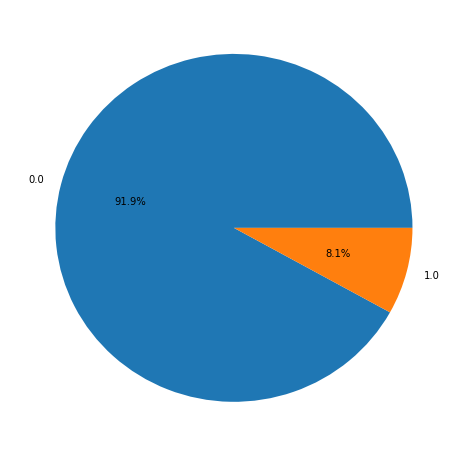

In [15]:
target_balance = check_balance(application_train, 'target')
draw_pie_chart(target_balance)
target_balance

# Compare the distribution for data with different targes

In [32]:
def compare_percent(data, feature):
    df_0 = check_balance(data[data['target'] == 0], feature)
    df_1 = check_balance(data[data['target'] == 1], feature)
    tmp_data = np.array([df_0['count'].tolist(), df_1['count'][df_0.index].tolist()])
   
    fig, ax = plt.subplots()
    size = 0.3
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(3)*4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
    tmp_data = tmp_data.T
    ax.pie(tmp_data.sum(axis=1), radius=1 - size, colors=outer_colors,
           wedgeprops=dict(width=size, edgecolor='w'), labels=df_0.index, autopct='%1.1f%%', 
           pctdistance=0.5, labeldistance=0.6)

    ax.pie(tmp_data.flatten(), radius=1, colors=inner_colors,
           wedgeprops=dict(width=size, edgecolor='w'), labels=['0', '1'] * len(tmp_data), 
           autopct='%1.1f%%', explode = [int(i/2)*0.1 for i in range(len(tmp_data)*2)],
           pctdistance=0.8, labeldistance=1.1)

    ax.set(aspect="equal", title= 'Compare {} data for different labels'.format(feature))

    fig = plt.gcf()
    fig.set_size_inches(12, 12)
    
    return tmp_data

In [33]:
application_train.head()

,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,sk_id_bureau,months_balance,status
0,100002.0,1.0,Cash loans,M,N,Y,0.0,202500.0,406597.5,24700.5,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,None,None,None
1,100003.0,0.0,Cash loans,F,N,N,0.0,270000.0,1293502.5,35698.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None
2,100004.0,0.0,Revolving loans,M,Y,Y,0.0,67500.0,135000.0,6750.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None
3,100006.0,0.0,Cash loans,F,N,Y,0.0,135000.0,312682.5,29686.5,...,0.0,None,None,None,None,None,None,None,None,None
4,100007.0,0.0,Cash loans,M,N,Y,0.0,121500.0,513000.0,21865.5,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,None,None


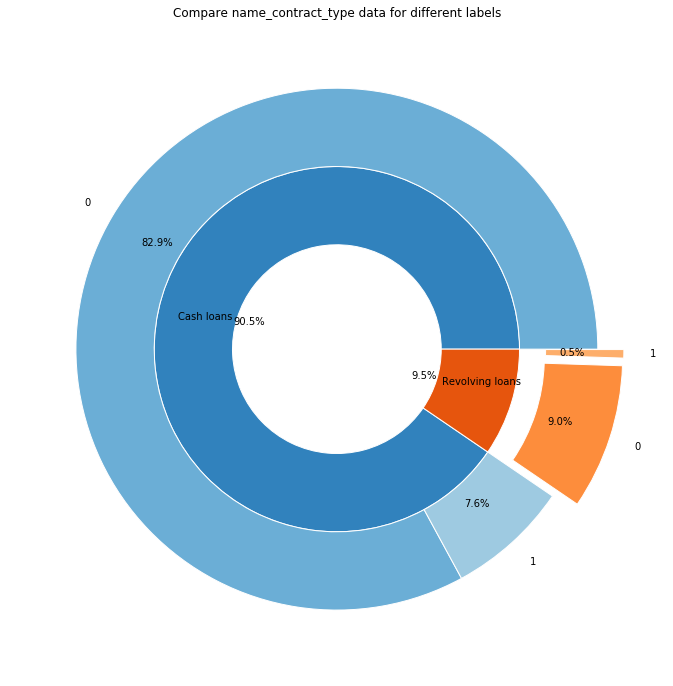

In [34]:
vals = compare_percent(application_train, 'name_contract_type')

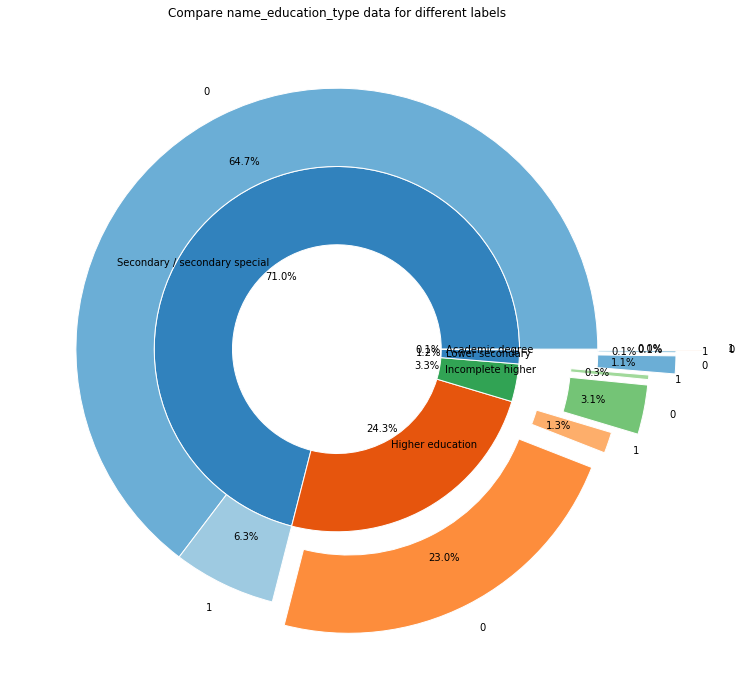

In [35]:
vals = compare_percent(application_train, 'name_education_type')

In [20]:
def compare_hist(data, feature):
    df_0 = check_balance(data[data['target'] == 0], feature)
    df_1 = check_balance(data[data['target'] == 1], feature)
    tmp_data = np.array([df_0['count'].tolist(), df_1['count'][df_0.index].tolist()])
   
    fig, ax = plt.subplots()
    cmap = plt.get_cmap("tab20c")
    outer_colors = cmap(np.arange(3)*4)
    inner_colors = cmap(np.array([1, 2, 5, 6, 9, 10]))
    tmp_data = tmp_data.T
    
    plt.hist([d for d in tmp_data], stacked=True, label=['Survived','Dead'])

    #ax.set(aspect="equal", title= 'Compare {} data for different labels'.format(feature))

    fig = plt.gcf()
    fig.set_size_inches(10, 10)
    
    return tmp_data